Perform Facial Recognition with Deep Learning in Keras Using CNN

DESCRIPTION

Problem Statement:
Facial recognition is a biometric alternative that measures unique characteristics of a human
face. Applications available today include flight check in, tagging friends and family members in
photos, and “tailored” advertising. You are a computer vision engineer who needs to develop a
face recognition programme with deep convolutional neural networks.
Objective: Use a deep convolutional neural network to perform facial recognition using Keras.
Dataset Details:
ORL face database composed of 400 images of size 112 x 92. There are 40 people, 10 images
per person. The images were taken at different times, lighting and facial expressions. The faces
are in an upright position in frontal view, with a slight left-right rotation.
Link to the Dataset: https://www.dropbox.com/s/i7uzp5yxk7wruva/ORL_faces.npz?dl=0

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np

### Load the dataset

In [2]:
trainX = np.load('./resources/ORL_faces/trainX.npy')
trainY = np.load('./resources/ORL_faces/trainY.npy')
testX = np.load('./resources/ORL_faces/testX.npy')
testY = np.load('./resources/ORL_faces/testY.npy')

In [3]:
trainX.shape, trainY.shape, testX.shape, testY.shape

((240, 10304), (240,), (160, 10304), (160,))

### convert to multiclass

In [4]:
trainY = tf.keras.utils.to_categorical(trainY)
testY = tf.keras.utils.to_categorical(testY)

In [5]:
trainY[0].shape, testY[0].shape

((20,), (20,))

### reshape each image to (112, 92, 1)

In [6]:
trainX  = trainX.reshape(trainX.shape[0], 112, 92, 1)
testX   = testX.reshape(testX.shape[0], 112, 92, 1)

In [7]:
trainX[0].shape, testX[0].shape

((112, 92, 1), (112, 92, 1))

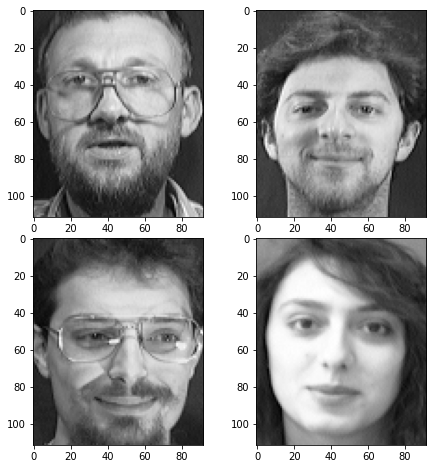

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8,8), )
fig.subplots_adjust(hspace=0.1, wspace=0.0)
for n_subplot in axs.ravel():
    n_subplot.imshow(trainX[np.random.randint(0, len(trainX))], cmap='gray',)

### build model

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [10]:
# create the model
model = Sequential()
model.add(tf.keras.layers.Reshape((112, 92, 1), input_shape=(112, 92, 1)))
model.add(tf.keras.layers.BatchNormalization())

# add cnn layers
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))

# add cnn layers
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))

# add cnn layers
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu',))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))

#Fully Connected Layer
model.add(Flatten())
#output layer
model.add(Dense(20, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 112, 92, 1)        0         
                                                                 
 batch_normalization (BatchN  (None, 112, 92, 1)       4         
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 110, 90, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 55, 45, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 55, 45, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 53, 43, 64)        1

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### train model

In [13]:
history = model.fit(x=trainX, y=trainY, validation_data=(testX,testY), epochs=30, batch_size=16)

Epoch 1/30
15/15 [==============================] - 2s 129ms/step - loss: 3.0382 - accuracy: 0.1417 - val_loss: 2.9679 - val_accuracy: 0.0500
Epoch 2/30
15/15 [==============================] - 2s 118ms/step - loss: 1.9878 - accuracy: 0.4500 - val_loss: 14.0590 - val_accuracy: 0.0500
Epoch 3/30
15/15 [==============================] - 2s 114ms/step - loss: 0.4621 - accuracy: 0.8583 - val_loss: 22.3622 - val_accuracy: 0.0500
Epoch 4/30
15/15 [==============================] - 2s 112ms/step - loss: 0.4188 - accuracy: 0.9000 - val_loss: 14.2461 - val_accuracy: 0.0500
Epoch 5/30
15/15 [==============================] - 2s 114ms/step - loss: 0.1731 - accuracy: 0.9500 - val_loss: 10.5798 - val_accuracy: 0.0500
Epoch 6/30
15/15 [==============================] - 2s 109ms/step - loss: 0.0753 - accuracy: 0.9792 - val_loss: 6.9931 - val_accuracy: 0.0625
Epoch 7/30
15/15 [==============================] - 2s 105ms/step - loss: 0.0235 - accuracy: 0.9917 - val_loss: 6.5290 - val_accuracy: 0.0875
Ep

In [45]:
model.evaluate(testX,testY)

5/5 [==============================] - 0s 37ms/step - loss: 0.3109 - accuracy: 0.9625


[0.31087201833724976, 0.9624999761581421]

### plot the result

<AxesSubplot:>

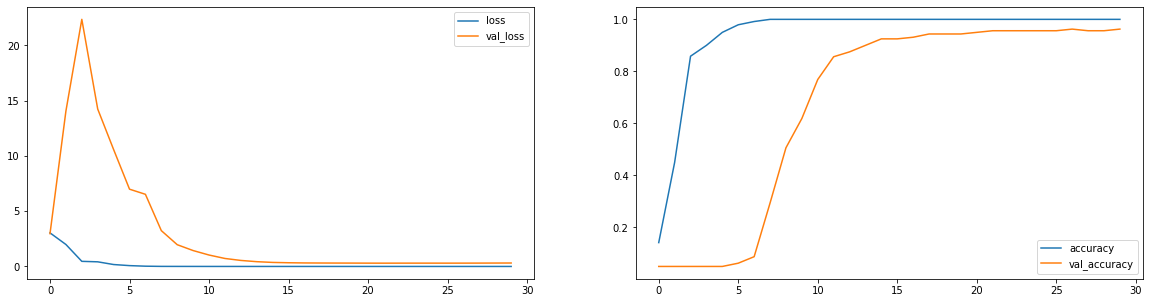

In [43]:
import seaborn as sns
fig, axs = plt.subplots(1,2, figsize=(20,5))
sns.lineplot(x=history.epoch,y=history.history['loss'], label='loss', ax=axs[0])
sns.lineplot(x=history.epoch,y=history.history['val_loss'], label='val_loss', ax=axs[0])

sns.lineplot(x=history.epoch,y=history.history['accuracy'], label='accuracy', ax=axs[1])
sns.lineplot(x=history.epoch,y=history.history['val_accuracy'], label='val_accuracy', ax=axs[1])